# Practicamos EDA

In [ ]:
# importamos módulos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importación del conjunto de datos

data = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
# visualización parcial del conjunto de datos

data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# importante revisar los tipos de variable que se han interpretado en la importación

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
# otra forma...

data.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64


In [ ]:
# lista con los nombres de las características

data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
# cambiamos etiqueta de características

data.rename(columns={"housing_median_age": "antigüedad_media", "median_income": "ingresos_medios"}, inplace = True)
data.columns

Index(['longitude', 'latitude', 'antigüedad_media', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'ingresos_medios',
       'median_house_value'],
      dtype='object')

In [ ]:
# valores repetidos

data.nunique()

,0
longitude,827
latitude,840
antigüedad_media,52
total_rooms,5533
total_bedrooms,1848
population,3683
households,1740
ingresos_medios,11175
median_house_value,3694


In [ ]:
# valores faltantes

data.isnull().sum()

,0
longitude,0
latitude,0
antigüedad_media,0
total_rooms,0
total_bedrooms,0
population,0
households,0
ingresos_medios,0
median_house_value,0


In [ ]:
# eliminación de caracterísiticas innecesarias

data = data.drop(['total_rooms'], axis = 1)

In [ ]:
data.head(3)

,longitude,latitude,antigüedad_media,total_bedrooms,population,households,ingresos_medios,median_house_value
0,-114.31,34.19,15.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,174.0,333.0,117.0,1.6509,85700.0


In [ ]:
# resumen estadístico de las características disponibles

data.describe()

,longitude,latitude,antigüedad_media,total_bedrooms,population,households,ingresos_medios,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# queremos ver un registro en particular por su índice

data.iloc[5]

,5
longitude,-114.5800
latitude,33.6300
antigüedad_media,29.0000
total_bedrooms,236.0000
population,671.0000
households,239.0000
ingresos_medios,3.3438
median_house_value,74000.0000


In [ ]:
# en lugar de un registro particular vemos un rango

data[1:5]['median_house_value']

,median_house_value
1,80100.0
2,85700.0
3,73400.0
4,65500.0


In [ ]:
data.shape

(17000, 8)

In [ ]:
data.shape[1]

8

In [ ]:
# buscar registros con valor medio de ingresos superior al tercer cuartil

print(data[data['ingresos_medios'] > 4.65].shape[0] / data.shape[0] * 100, '%')

26.829411764705885 %


In [ ]:
# vamos a generar un dataset con algunos defectos...

data_fault = data.copy()
data_fault.head(5)

,longitude,latitude,antigüedad_media,total_bedrooms,population,households,ingresos_medios,median_house_value
0,-114.31,34.19,15.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data_fault.loc[2, 'ingresos_medios'] = None

In [ ]:
data_fault.head(5)

,longitude,latitude,antigüedad_media,total_bedrooms,population,households,ingresos_medios,median_house_value
0,-114.31,34.19,15.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,174.0,333.0,117.0,NaN,85700.0
3,-114.57,33.64,14.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data_fault.isna().sum()

,0
longitude,0
latitude,0
antigüedad_media,0
total_bedrooms,0
population,0
households,0
ingresos_medios,1
median_house_value,0


In [ ]:
# buscamos el registro con el valor faltante

data_fault[data_fault['ingresos_medios'].isnull()]

,longitude,latitude,antigüedad_media,total_bedrooms,population,households,ingresos_medios,median_house_value
2,-114.56,33.69,17.0,174.0,333.0,117.0,NaN,85700.0


In [ ]:
# una forma de asignar el valor faltante es buscar la media de los ingresos para los hogares del mismo distrito y aproximado valor de la casa

data_slice = data_fault[(data_fault['longitude'] < -114.0) & (data_fault['longitude'] > -115.0) & (data_fault['latitude'] > 33.0) & (data_fault['longitude'] < 34.0) & ~(data_fault['ingresos_medios'].isna())]
data_slice

,longitude,latitude,antigüedad_media,total_bedrooms,population,households,ingresos_medios,median_house_value
0,-114.31,34.19,15.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,1901.0,1129.0,463.0,1.8200,80100.0
3,-114.57,33.64,14.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,309.0,787.0,271.0,2.1908,48100.0
10,-114.60,33.62,16.0,801.0,2434.0,824.0,2.6797,86500.0


In [ ]:
data_slice['ingresos_medios'].mean()

2.1751300000000002

In [ ]:
# mas sofisticado...veamos la correlacion lineal entre los ingresos y el resto de características

data_slice.corr(method = 'pearson')

,longitude,latitude,antigüedad_media,total_bedrooms,population,households,ingresos_medios,median_house_value
longitude,1.000000,0.039764,0.097981,0.613131,0.375345,0.456098,-0.077076,0.197383
latitude,0.039764,1.000000,0.470927,0.013102,-0.207573,-0.179153,-0.105554,-0.280413
antigüedad_media,0.097981,0.470927,1.000000,-0.188358,0.054180,0.018023,0.068827,-0.279129
total_bedrooms,0.613131,0.013102,-0.188358,1.000000,0.598813,0.675881,-0.091929,0.398463
population,0.375345,-0.207573,0.054180,0.598813,1.000000,0.987831,0.182828,0.340988
households,0.456098,-0.179153,0.018023,0.675881,0.987831,1.000000,0.153532,0.395954
ingresos_medios,-0.077076,-0.105554,0.068827,-0.091929,0.182828,0.153532,1.000000,0.598821
median_house_value,0.197383,-0.280413,-0.279129,0.398463,0.340988,0.395954,0.598821,1.000000


In [ ]:
from sklearn import linear_model

ml = linear_model.LinearRegression()

x = data_slice['median_house_value'].values.reshape(-1,1)
y = data_slice['ingresos_medios'].values.reshape(-1,1)
ml.fit(x, y)
print (ml.coef_)

[[2.67405307e-05]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_predict = ml.predict(x)
print ('Valor de ajuste', r2_score(y, y_predict))
print ('Error cuadrático medio', mean_squared_error(y, y_predict))

Valor de ajuste 0.35858714724344
Error cuadrático medio 0.32481570266630433


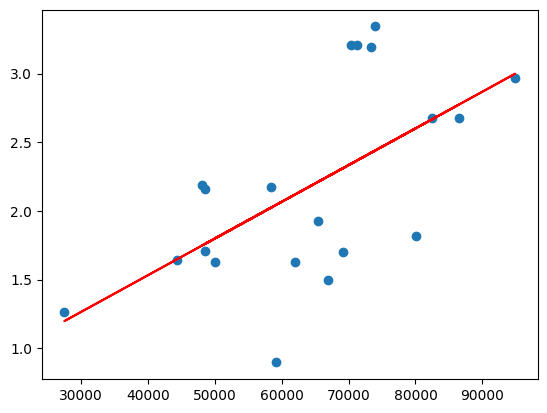

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='red')
plt.show()

In [ ]:
# que valor de ingresos le correspondería a un valor del hogar de 85.700 ?

valor_hogar = [[85700]]

ingresos_valor_faltante = ml.predict(valor_hogar)
print(ingresos_valor_faltante)

[[2.75379509]]


In [ ]:
# asignamos este valor al valor faltante en el dataset

data_fault.loc[2,'ingresos_medios'] = ingresos_valor_faltante

In [ ]:
# vemos si ya no quedan valores faltantes

data_fault.isnull().sum()

,0
longitude,0
latitude,0
antigüedad_media,0
total_bedrooms,0
population,0
households,0
ingresos_medios,0
median_house_value,0


## veamos como se distribuyen las diferentes características

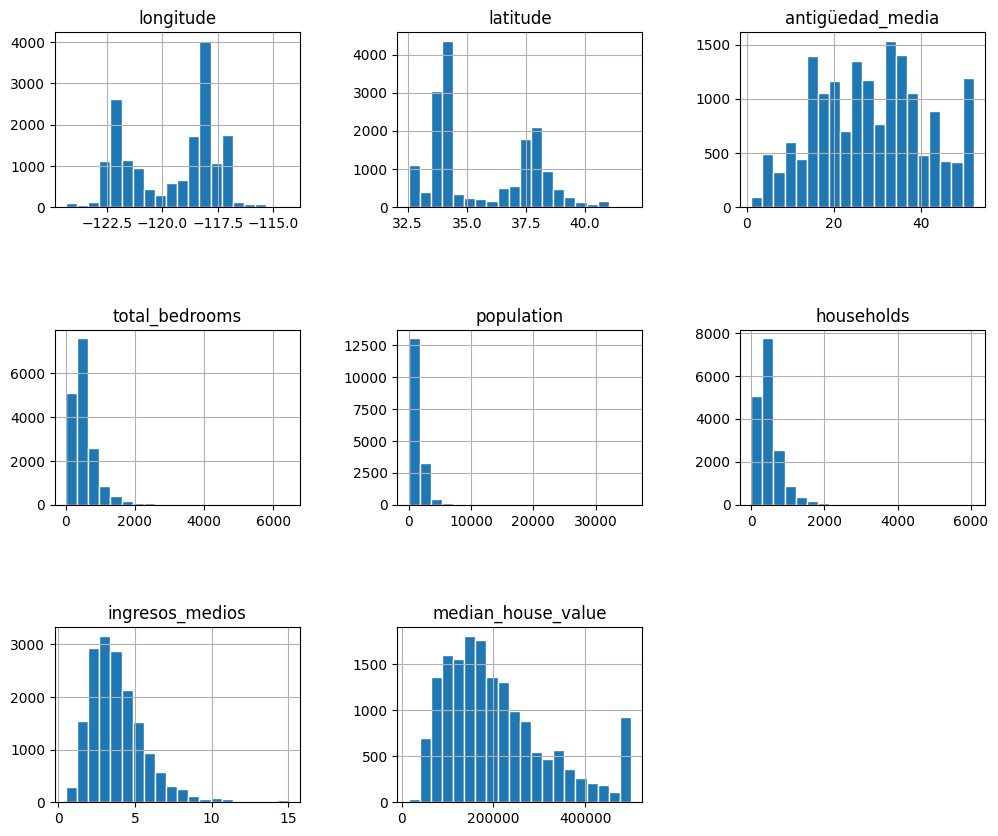

In [ ]:
data.hist(figsize=(12, 10), bins=20, edgecolor="white")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: ylabel='ingresos_medios'>

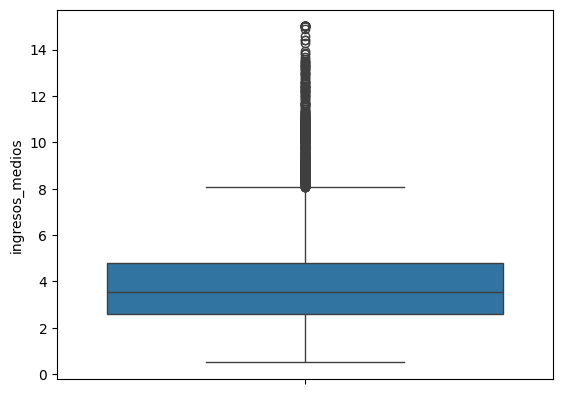

In [ ]:

sns.boxplot(data['ingresos_medios'])

<Axes: >

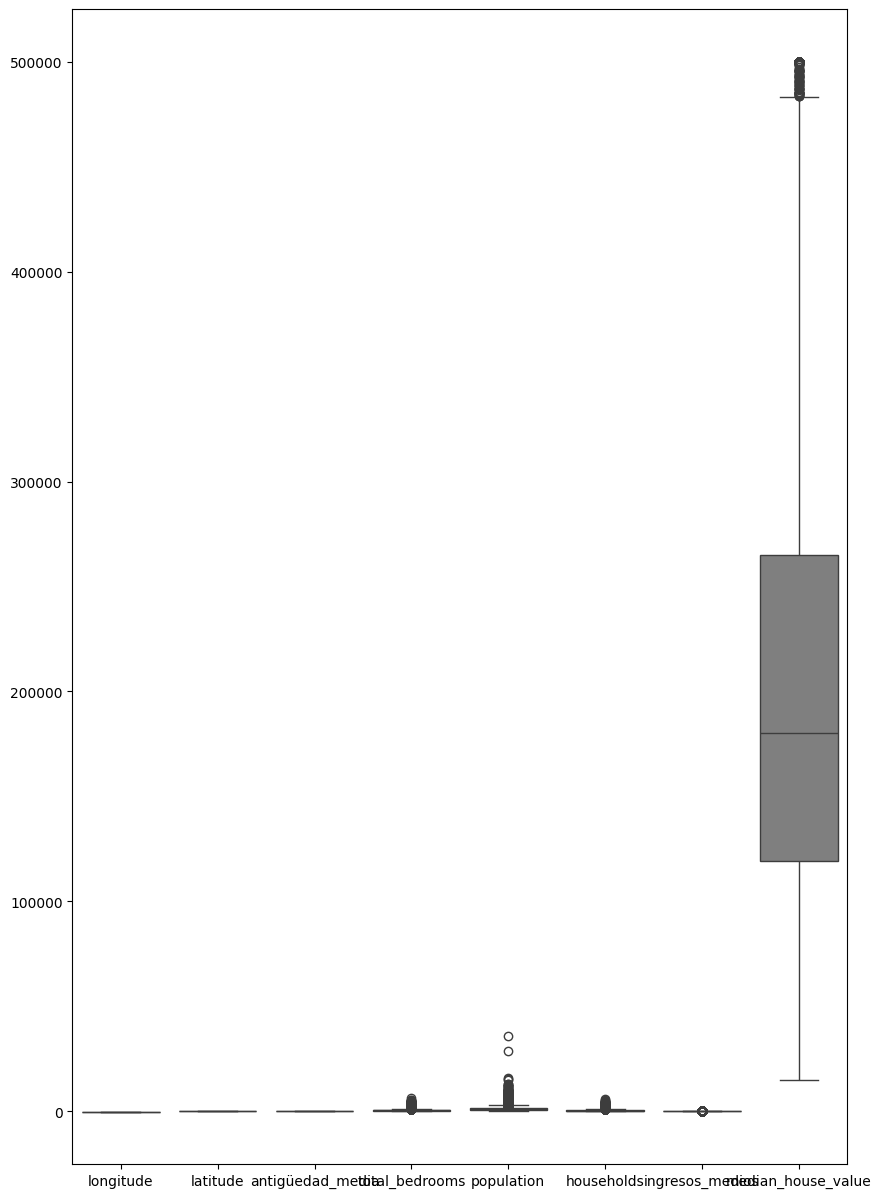

In [ ]:
plt.figure(figsize=(10,15))
sns.boxplot(data)

<Figure size 1300x1500 with 0 Axes>

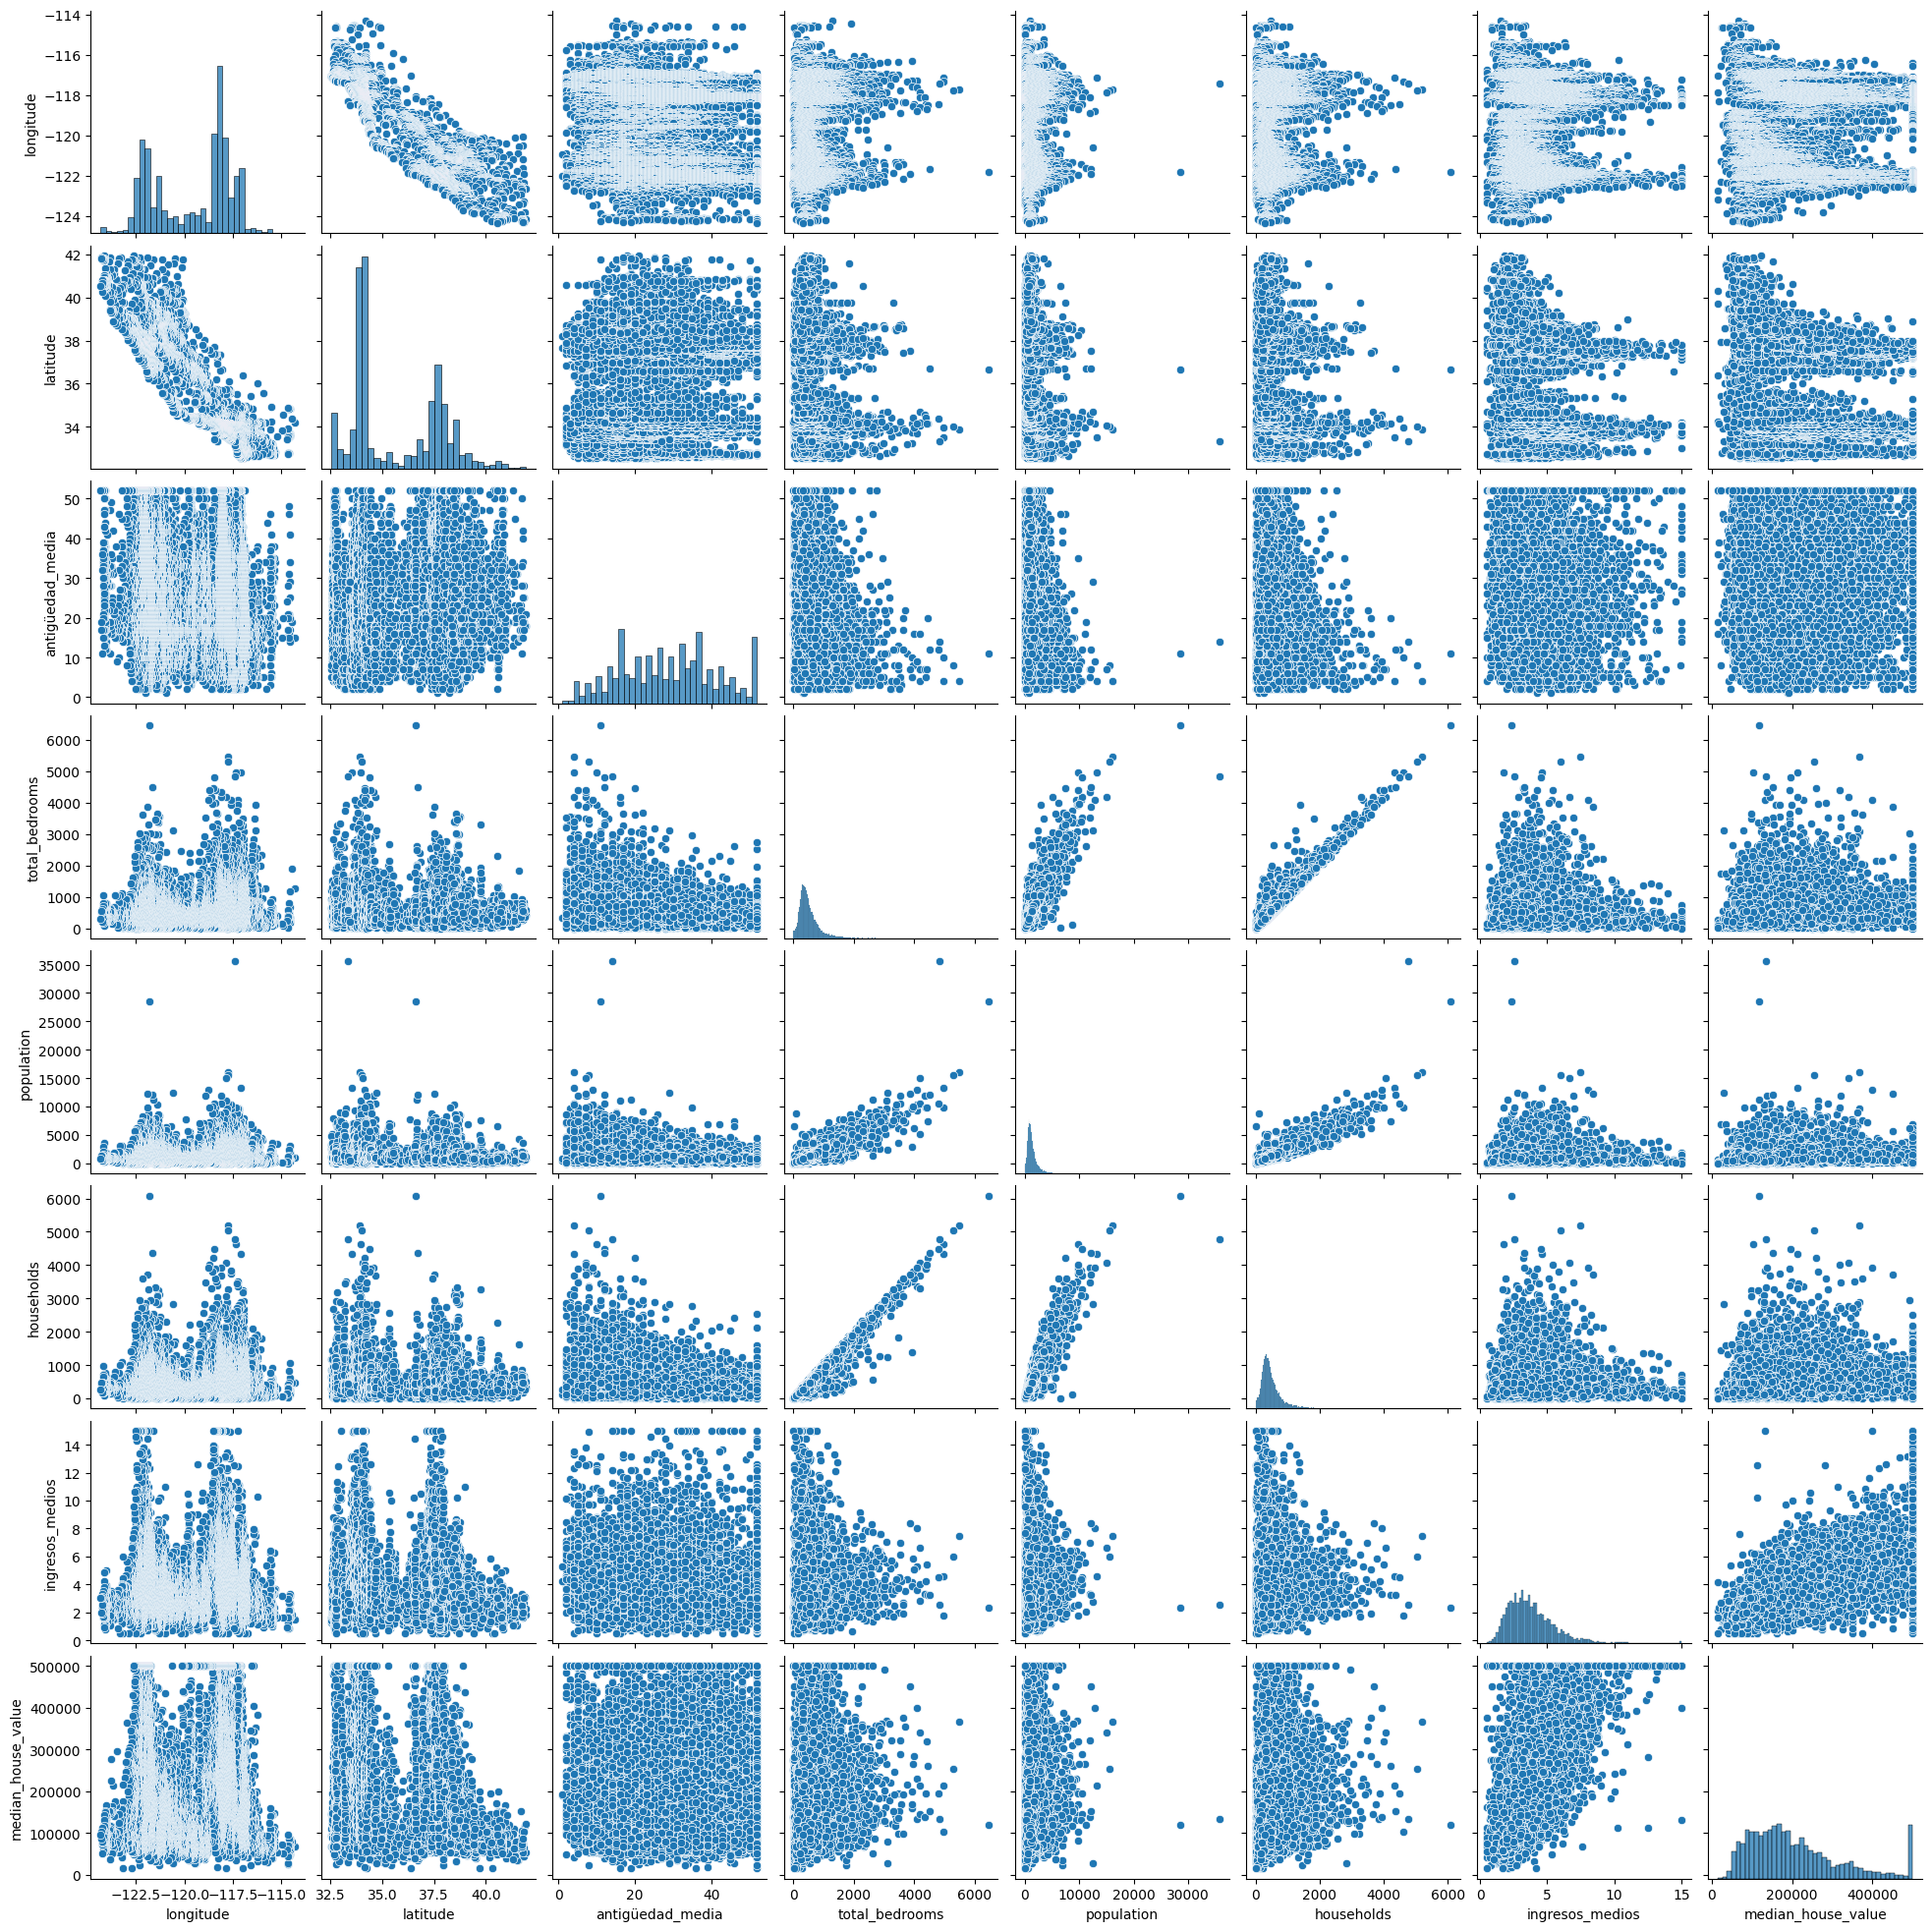

In [ ]:
plt.figure(figsize=(13,15))
sns.pairplot(data)
plt.show()

<Axes: >

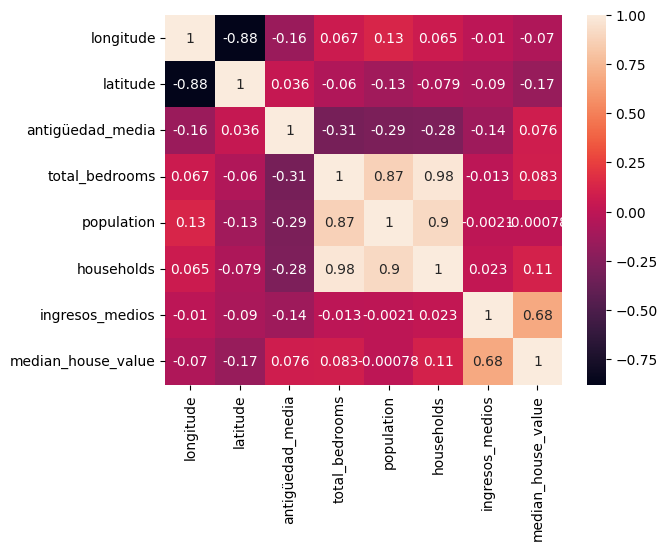

In [ ]:
sns.heatmap(data.corr(method = 'spearman'), annot = True)

In [ ]:
data.corr(method = 'spearman')

,longitude,latitude,antigüedad_media,total_bedrooms,population,households,ingresos_medios,median_house_value
longitude,1.000000,-0.879422,-0.155513,0.066928,0.127279,0.064688,-0.010154,-0.069728
latitude,-0.879422,1.000000,0.036253,-0.059780,-0.126854,-0.078505,-0.089768,-0.167714
antigüedad_media,-0.155513,0.036253,1.000000,-0.307599,-0.285526,-0.281980,-0.143134,0.075706
total_bedrooms,0.066928,-0.059780,-0.307599,1.000000,0.872507,0.975970,-0.012730,0.082801
population,0.127279,-0.126854,-0.285526,0.872507,1.000000,0.904726,-0.002122,-0.000781
households,0.064688,-0.078505,-0.281980,0.975970,0.904726,1.000000,0.023498,0.108806
ingresos_medios,-0.010154,-0.089768,-0.143134,-0.012730,-0.002122,0.023498,1.000000,0.680814
median_house_value,-0.069728,-0.167714,0.075706,0.082801,-0.000781,0.108806,0.680814,1.000000


<Axes: >

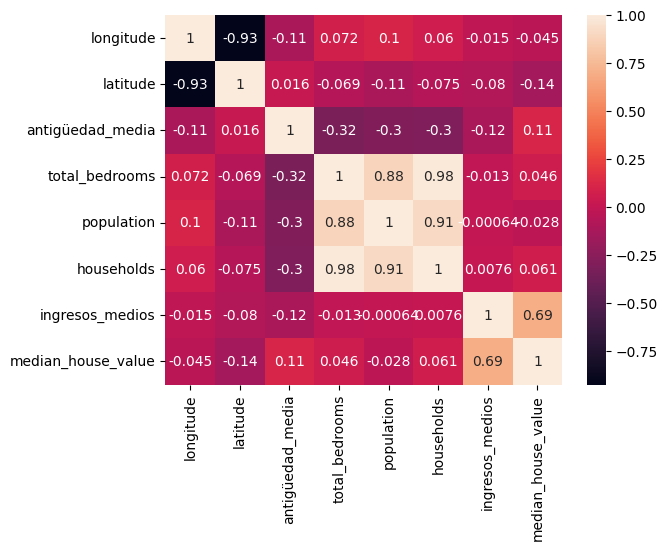

In [ ]:
sns.heatmap(data.corr(method = 'pearson'), annot = True)

<Axes: xlabel='longitude', ylabel='latitude'>

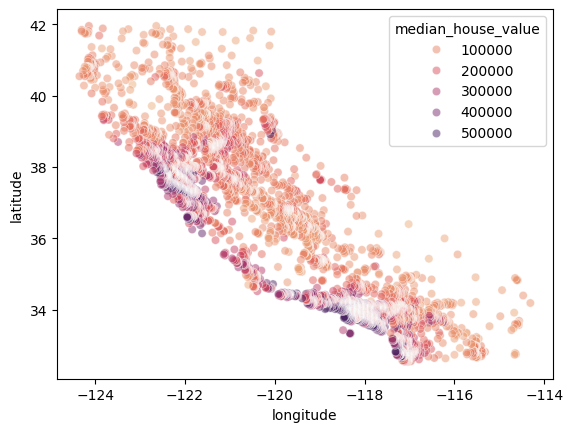

In [ ]:
# graficamos coste medio de la vivienda en función de latitud/longitud

sns.scatterplot(x=data['longitude'], y=data['latitude'],hue=data['median_house_value'], palette='flare', alpha=0.5)

#https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette